In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [77]:
site = "D"

In [36]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843280 entries, 0 to 843279
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ts                             843280 non-null  object 
 1   instanceID                     843280 non-null  object 
 2   AoARel                         832969 non-null  float64
 3   bladePitch                     832994 non-null  float64
 4   bladePitchMax                  832994 non-null  float64
 5   bladePitchMin                  832994 non-null  float64
 6   bladePitchSetPoint             0 non-null       float64
 7   bladePitchStd                  0 non-null       float64
 8   cP                             832969 non-null  float64
 9   generatorTorque                0 non-null       float64
 10  rotorTorque                    719304 non-null  float64
 11  TI                             832969 non-null  float64
 12  TSR                           

In [38]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843280 entries, 0 to 843279
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ts          843280 non-null  object
 1   instanceID  843280 non-null  object
 2   value       843280 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 19.3+ MB


In [44]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

16
['D_WTG01' 'D_WTG02' 'D_WTG03' 'D_WTG04' 'D_WTG05' 'D_WTG06' 'D_WTG07'
 'D_WTG08' 'D_WTG09' 'D_WTG10' 'D_WTG11' 'D_WTG12' 'D_WTG13' 'D_WTG14'
 'D_WTG15' 'D_WTG16']


**Comment:** data size: 843280 x 26; flag size: 843280 x 3. There are 16 turbines. 366 x 16 x 24 x 6 + 16 = 843280. No missing rows.

In [45]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [46]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [47]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [48]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [49]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
242476,2020-04-15 05:40:00,4,15,5,D_WTG13,3.627500,0.230475,6.353551,5.0,51.500000,1
839009,2020-12-30 03:40:00,12,30,3,D_WTG02,5.157368,0.520019,10.083023,0.0,203.894737,1
676679,2020-10-20 16:40:00,10,20,16,D_WTG08,5.806500,1.244658,21.435593,11.1,-5.350000,0
375728,2020-06-12 01:50:00,6,12,1,D_WTG01,9.084000,1.923799,21.177888,10.0,1194.050000,1
481109,2020-07-27 19:30:00,7,27,19,D_WTG06,14.638421,1.689728,11.543105,10.0,2294.052632,1


### Plot time series

In [50]:
data_01 = data[data['instanceID'] == site + '_WTG01']

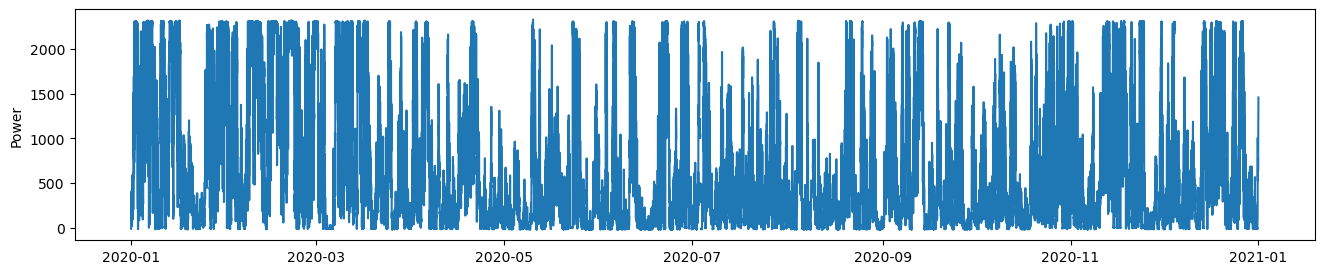

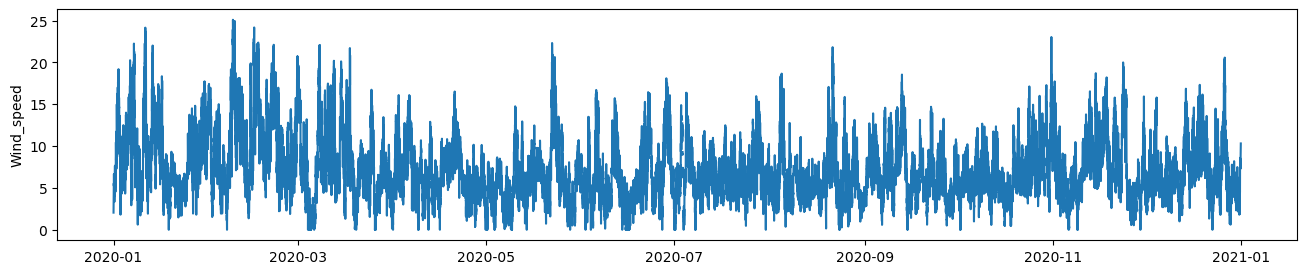

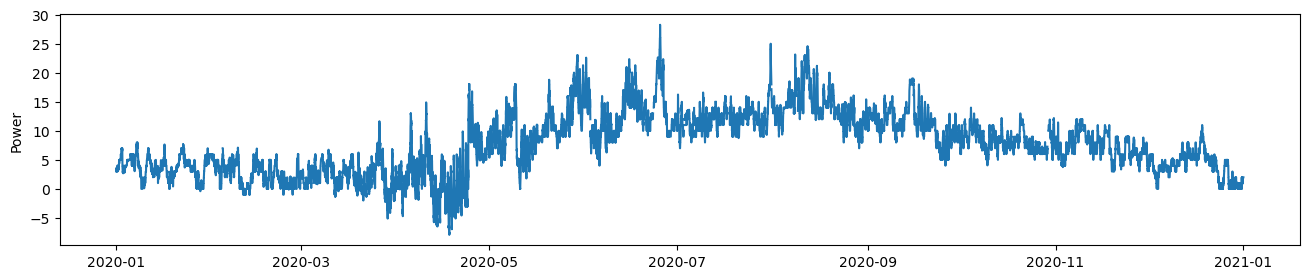

In [51]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Power')
plt.show()

### Full performance data

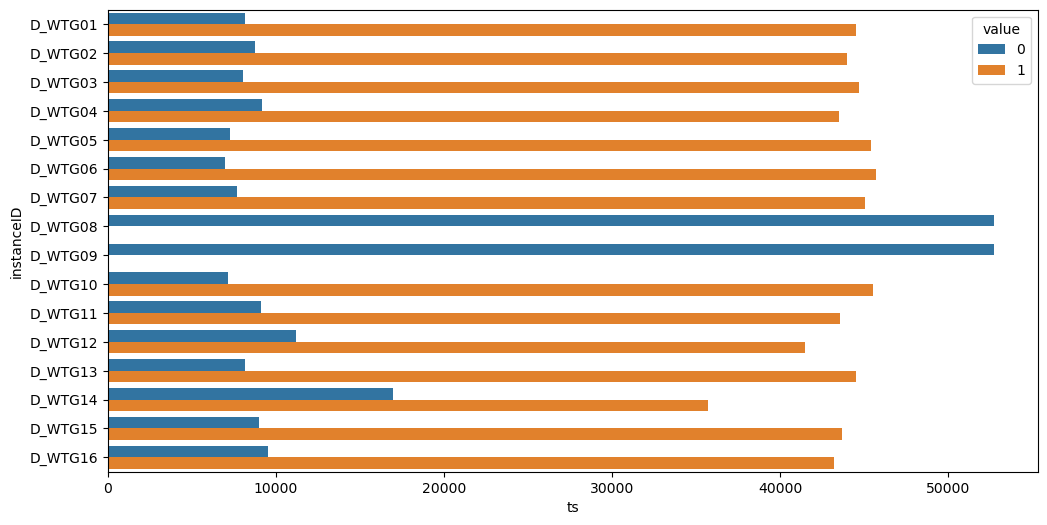

In [52]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")

plt.show()

In [53]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [54]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,610652.000000,610652.000000,610652.000000,610652.000000,610652.000000,610652.000000,610652.000000,610652.000000
mean,6.466873,15.648615,11.664354,7.806069,0.975796,12.524084,7.751894,788.553350
std,3.502405,8.719714,6.924892,3.612851,0.559218,4.714578,4.469251,747.064651
min,1.000000,1.000000,0.000000,1.898000,0.000000,0.000000,-7.900000,2.300000
25%,3.000000,8.000000,6.000000,5.117500,0.549284,9.233879,4.150000,168.250000
50%,7.000000,16.000000,12.000000,6.925500,0.854811,12.023571,7.000000,489.700000
75%,10.000000,23.000000,18.000000,9.623000,1.293952,15.216763,11.000000,1275.400000
max,12.000000,31.000000,23.000000,25.714000,6.784477,56.458443,28.263158,2337.350000


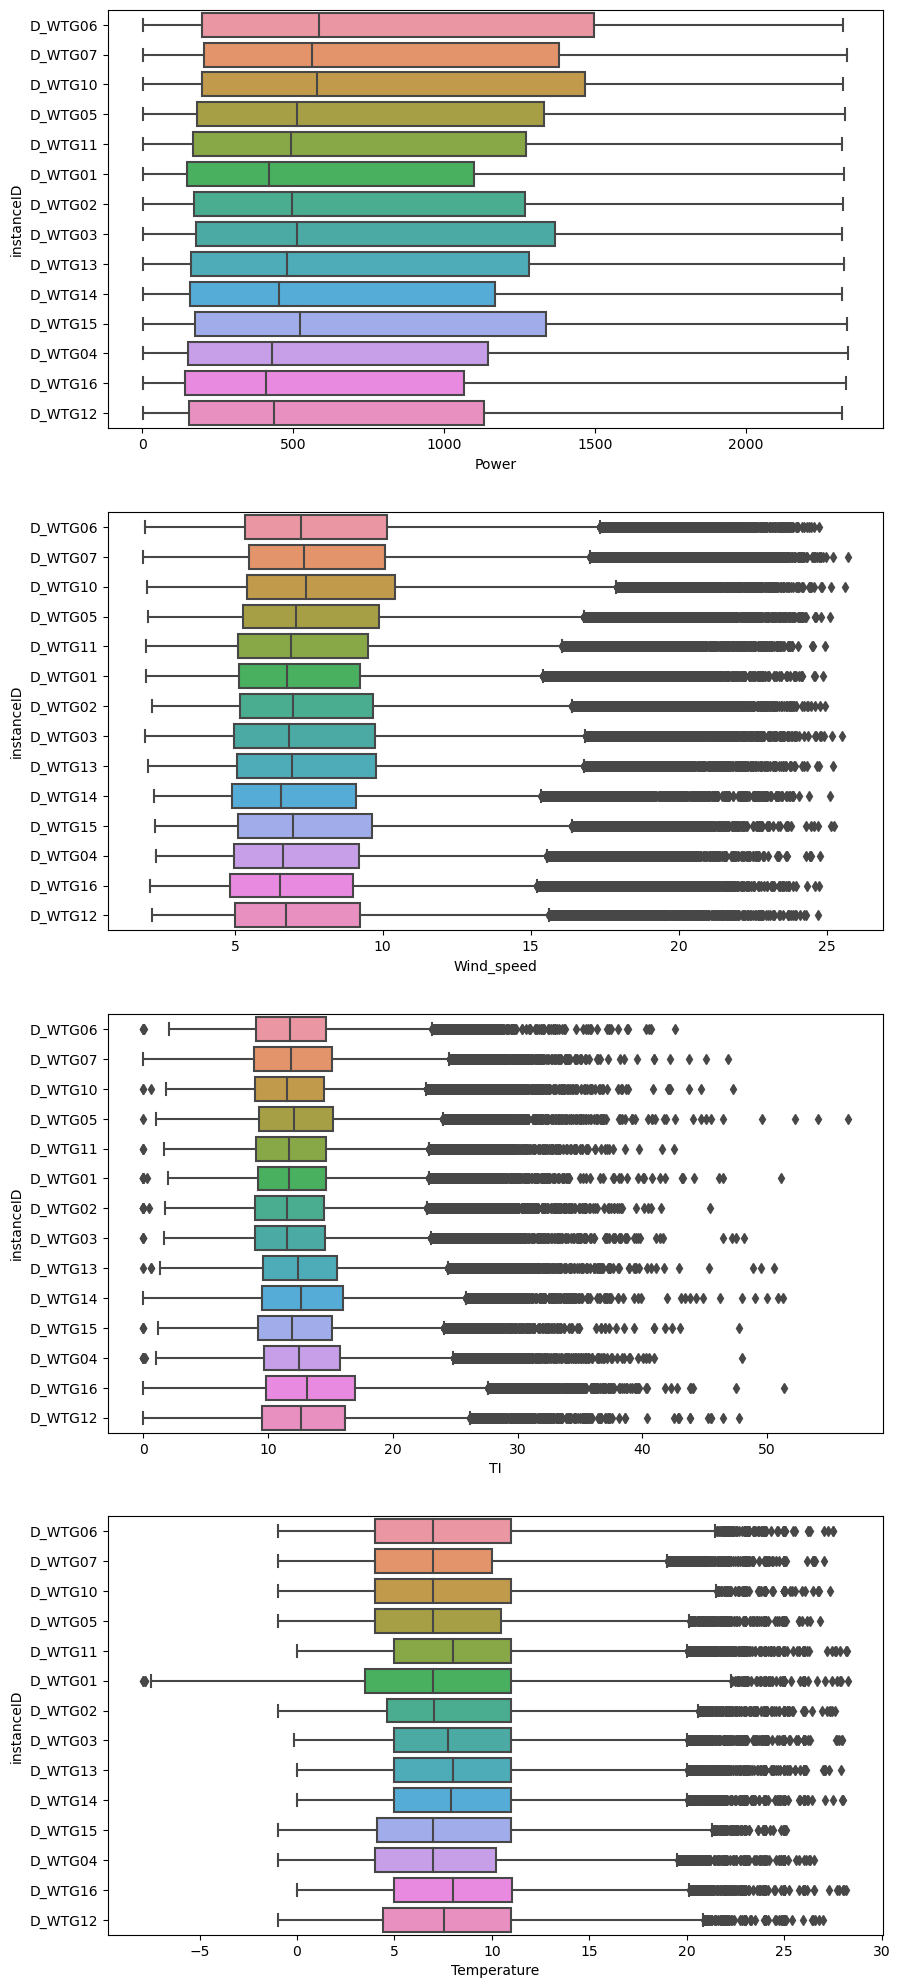

In [55]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (10,25))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

In [58]:
extreme_temperature = data_clean[(data_clean['Temperature'] < -5)]
extreme_temperature

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
203104,2020-03-29 03:40:00,3,29,3,D_WTG01,7.952222,1.334190,16.777569,-5.111111,777.722222
239408,2020-04-13 21:50:00,4,13,21,D_WTG01,6.594000,0.592405,8.984005,-5.350000,333.200000
239424,2020-04-13 22:00:00,4,13,22,D_WTG01,6.279000,0.552023,8.791569,-5.350000,345.650000
239440,2020-04-13 22:10:00,4,13,22,D_WTG01,6.362632,0.571313,8.979191,-5.315789,360.947368
239456,2020-04-13 22:20:00,4,13,22,D_WTG01,6.502105,0.801804,12.331458,-6.157895,335.894737
...,...,...,...,...,...,...,...,...,...,...
251168,2020-04-19 00:20:00,4,19,0,D_WTG01,9.093000,0.798123,8.777339,-6.950000,1074.450000
251184,2020-04-19 00:30:00,4,19,0,D_WTG01,7.665000,0.780215,10.178926,-5.700000,679.150000
253920,2020-04-20 05:00:00,4,20,5,D_WTG01,11.756000,1.141347,9.708638,-5.100000,2026.250000
253936,2020-04-20 05:10:00,4,20,5,D_WTG01,9.953889,0.876490,8.805504,-5.055556,1402.444444


In [59]:
extreme_temperature['instanceID'].value_counts()

D_WTG01    81
Name: instanceID, dtype: int64

In [60]:
# drop rows with extreme values
data_clean = data_clean[(data_clean['Temperature'] >= -5)]

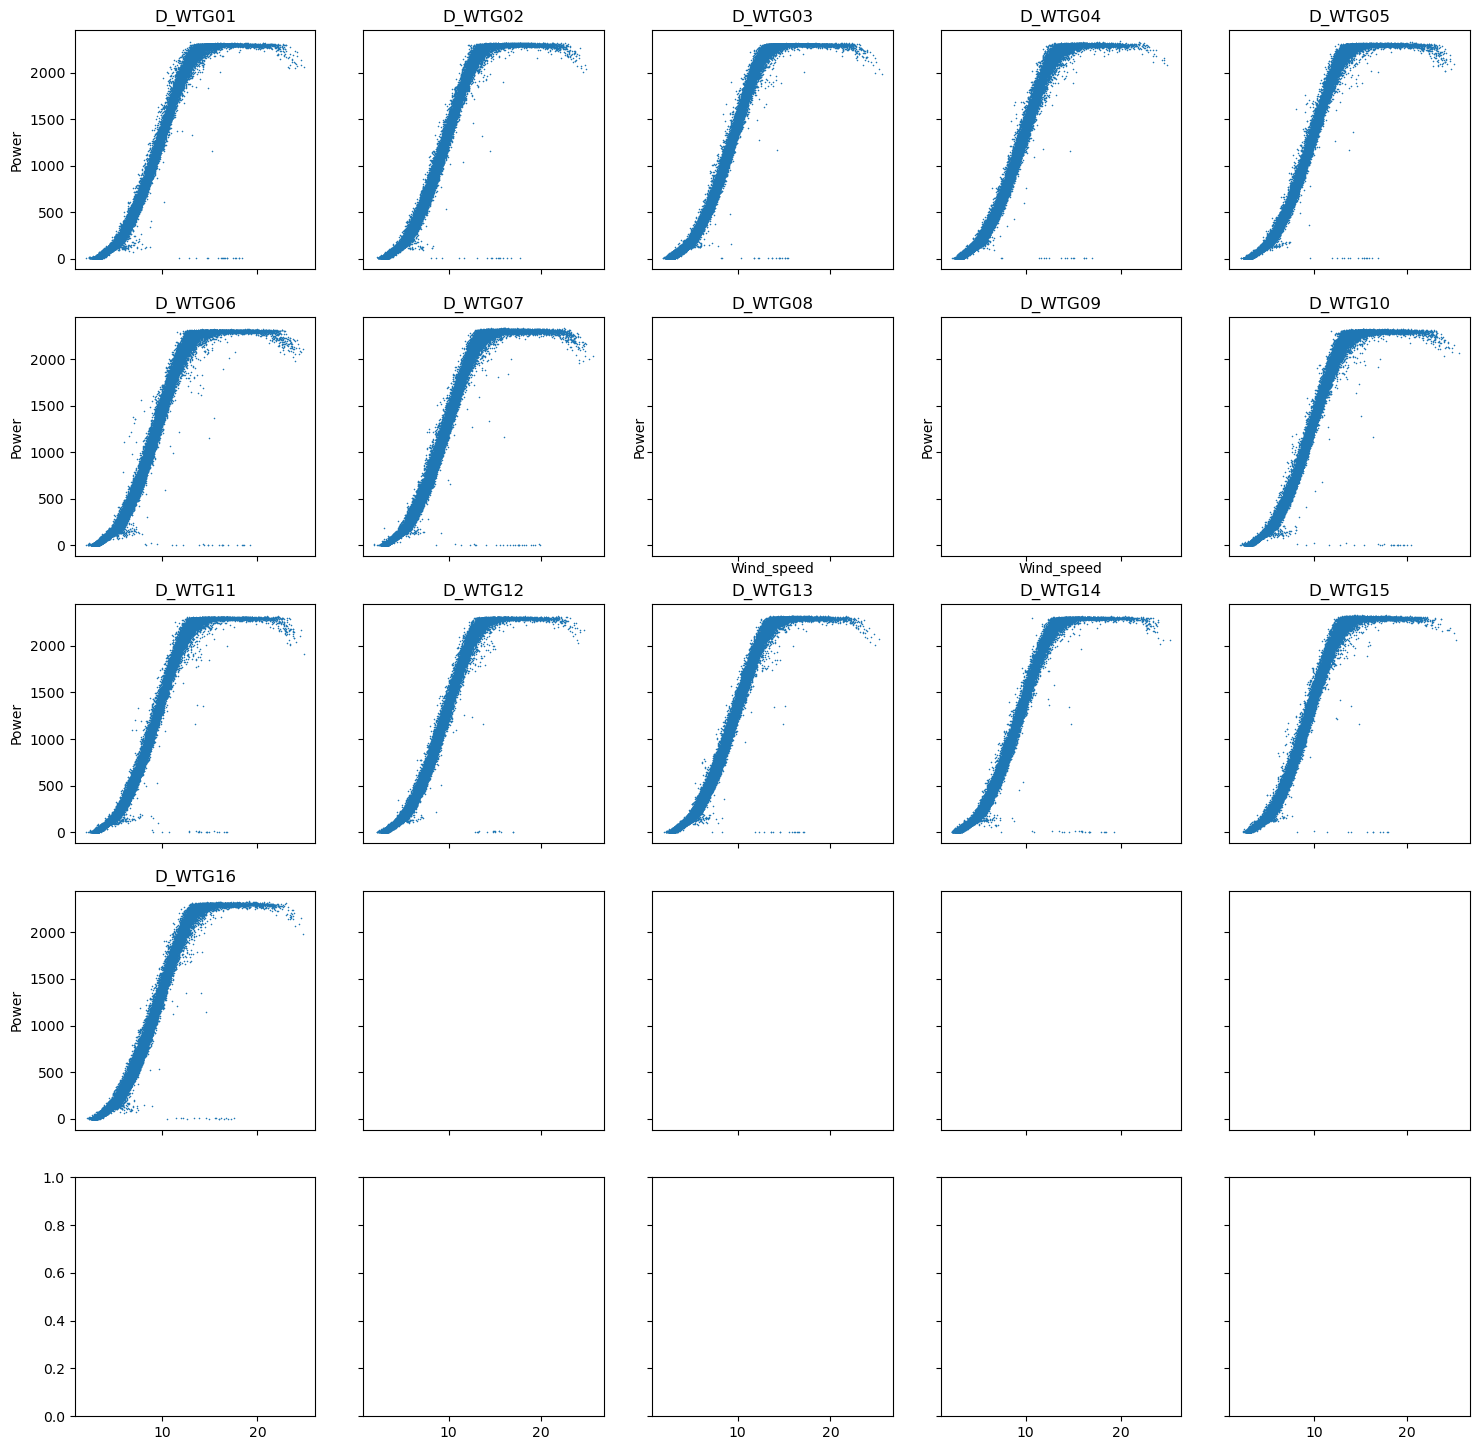

In [64]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (4):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break
plt.show()

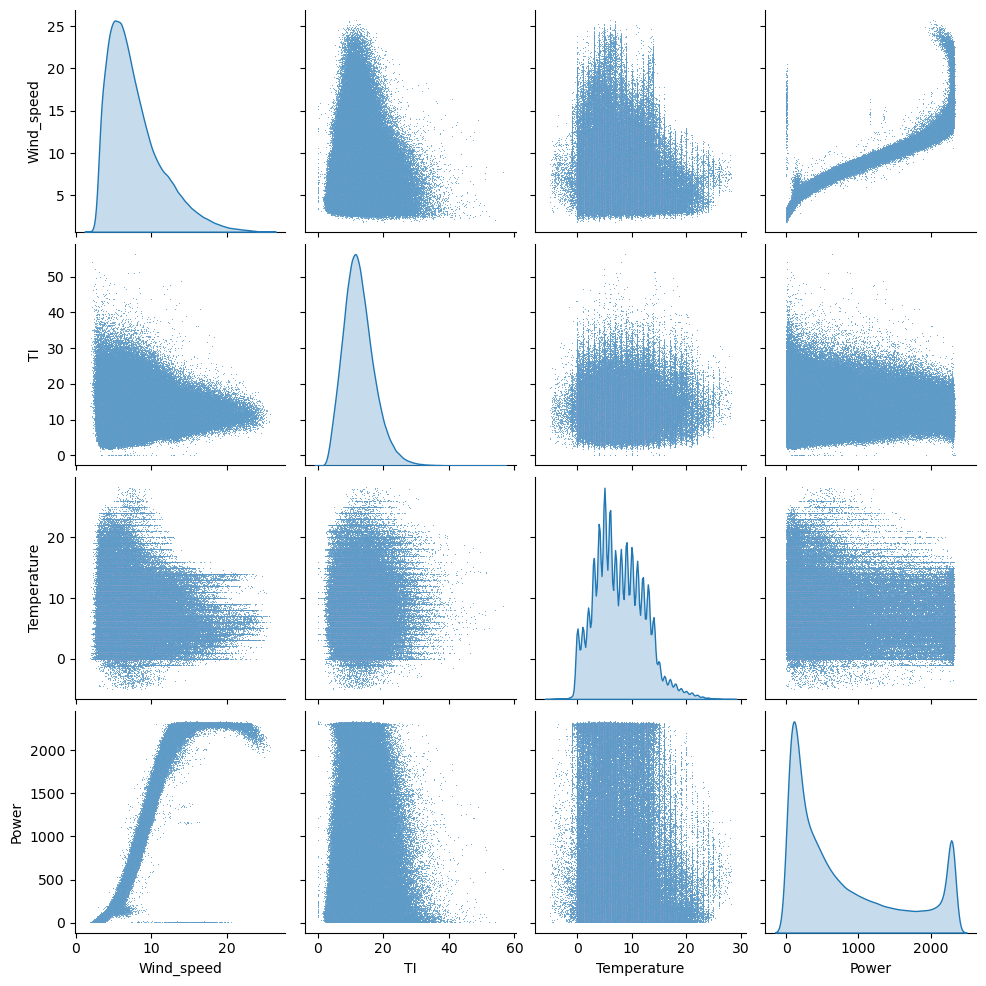

In [65]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

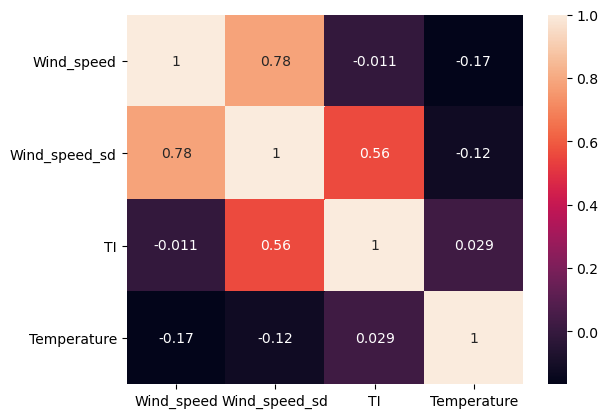

In [67]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

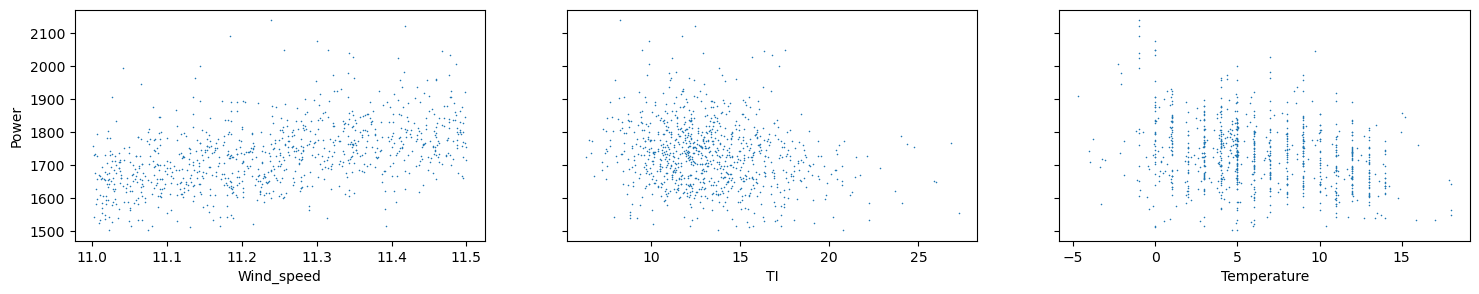

In [70]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 11) 
                           & (data_clean['Wind_speed'] <= 11.5)] 

features = ["Wind_speed", "TI", "Temperature", "Humidity", "Air_density"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

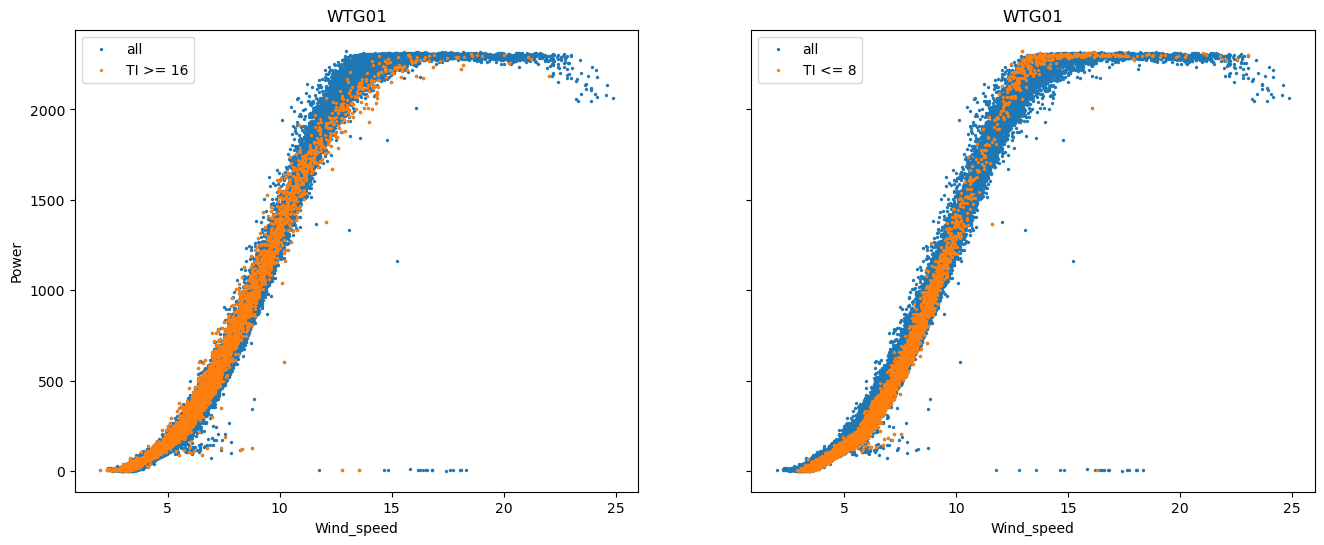

In [71]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == site + '_WTG01')]
WTG01_a = WTG01[(WTG01['TI'] >= 18)] 
WTG01_b = WTG01[(WTG01['TI'] <= 8)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[0], s = 5 , label = 'TI >= 16', edgecolor = None)
ax[0].set_xlabel('Wind_speed') 
ax[0].set_ylabel("Power") 
ax[0].set_title("WTG01") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[1], s = 5, label = 'TI <= 8', edgecolor = None)
ax[1].set_xlabel('Wind_speed') 
ax[1].set_ylabel("Power") 
ax[1].set_title("WTG01") 

plt.show()

### Export clean data

In [72]:
# data_clean.to_csv("")